# 7、数据标准化的意义

## 为什么要进行数据的标准化

+ 数据的不同特征在参与计算的时候，如果单位不统一，很可能造成样本间的距离被其中的某个或者某些特征所主导（这里最好有插图说明）

+ 特别要注意的一点是：测试数据集的标准化也一定要使用和训练数据集一样的标准化和方差（或者说最大值和最小值）。

那么解决方案是什么呢？一般来说有两种解决方案：第 1 种：将所有的数据映射到同一尺度；第 2 种：把所有数据映射到 0-1 之间。


## 数据标准化（Standardization）的两种方案


### 第 1 种：将所有的数据映射到同一尺度

$$
x_{{\rm scale}} = \cfrac{x - x_{{\rm mean}}}{S}
$$

经过这样的处理，就可以把所有数据归一到均值为 0 方差为 1 的分布中。


### 第 2 种：把所有数据映射到 0-1 之间

$$
x_{{\rm scale}} = \cfrac{x - x_{{\rm min}}}{x_{{\rm max}} - x_{{\rm min}}}
$$

+ 这种方式适用于分布有明显边界的情况。
+ 受outlier影响较大。

## 区分数据标准化（Standardization）和数据归一化（Normalization）

1、分割训练数据集和测试数据集；

2、只用训练数据集 fit 得到均值和标准差，这一步叫 fit；

3、分别对训练数据集和测试数据集进行 transform，注意，这里只需要传入 X_train 和 y_train 就可以了，不用传入标签；

4、使用 knn 算法进行评分，注意：传入的特征矩阵一定是要经过数据归一化的矩阵。

## 将特征缩放到 [0,1] 之间

In [1]:
x = np.random.randint(0, 100, 5)
x

array([61, 52, 78, 21,  7])

In [2]:
(x - np.min(x)) / (np.max(x) - np.min(x))

array([0.76056338, 0.63380282, 1.        , 0.1971831 , 0.        ])

In [3]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(x.reshape(-1, 1))
min_max_scaler.transform(x.reshape(-1, 1))

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.76056338],
       [0.63380282],
       [1.        ],
       [0.1971831 ],
       [0.        ]])

In [4]:
# 直接一步到位，fit 和 transform 一起做了
min_max_scaler.fit_transform(x.reshape(-1, 1))

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


array([[0.76056338],
       [0.63380282],
       [1.        ],
       [0.1971831 ],
       [0.        ]])

可以看到 preprocessing.MinMaxScaler() 的作用和  `(x-np.min(x))/(np.max(x)-np.min(x))`  是一样的。

下面再看一个例子。

In [5]:
X = np.random.randint(0, 100, (50, 2))
X = np.array(X, dtype=float)
X[:10,:]

array([[12., 15.],
       [62., 94.],
       [82., 88.],
       [63.,  6.],
       [15., 53.],
       [17., 47.],
       [63., 69.],
       [49., 95.],
       [20.,  6.],
       [21., 62.]])

In [6]:
X[:, 0] = (X[:, 0] - np.min(X[:, 0])) / (np.max(X[:, 0]) - np.min(X[:, 0]))
X[:, 1] = (X[:, 1] - np.min(X[:, 1])) / (np.max(X[:, 1]) - np.min(X[:, 1]))

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


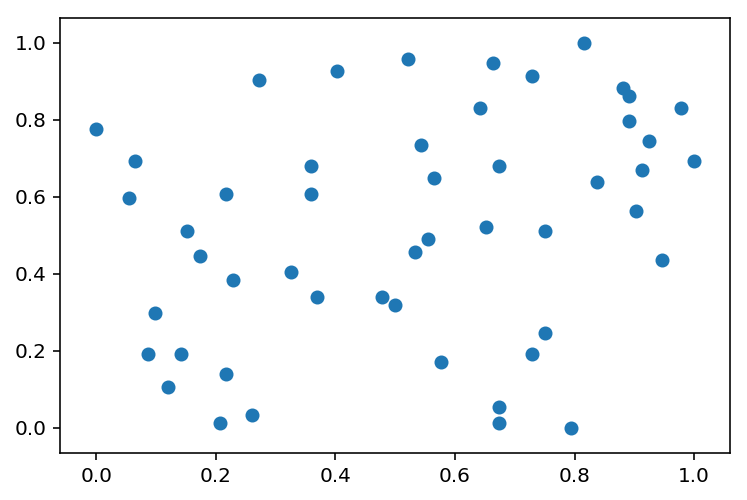

In [7]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## 均值标准差归一化 Standardization

In [8]:
X2 = np.arange(0, 9).reshape(3, 3)
X2

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [9]:
X2 = np.array(X2, dtype=float)

In [10]:
X2[:, 0] = (X2[:, 0] - np.mean(X2[:, 0])) / np.std(X2[:, 0])
X2[:, 1] = (X2[:, 1] - np.mean(X2[:, 1])) / np.std(X2[:, 1])
X2[:, 2] = (X2[:, 2] - np.mean(X2[:, 2])) / np.std(X2[:, 2])
X2

array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [11]:
X2[:,0].mean()

0.0

In [12]:
X2[:,0].std()

1.0

以上的数据操作都是针对矩阵的每一列进行的，因为每一列代表了特征矩阵的某一个特征。在 scikit-learn 中可以使用  `sklearn.preprocessing.StandardScaler` 来完成。

In [13]:
from sklearn import preprocessing

X2 = np.arange(0, 9).reshape(3, 3)
standard_scaler = preprocessing.StandardScaler()
standard_scaler.fit(X2)
X2_standscale = standard_scaler.transform(X2)
X2_standscale

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-1.22474487, -1.22474487, -1.22474487],
       [ 0.        ,  0.        ,  0.        ],
       [ 1.22474487,  1.22474487,  1.22474487]])

In [14]:
standard_scaler.mean_

array([3., 4., 5.])

In [15]:
standard_scaler.scale_

array([2.44948974, 2.44948974, 2.44948974])

In [16]:
X2_standscale[:,0].mean()

0.0

In [17]:
X2_standscale[:,1].mean()

0.0

In [18]:
X2_standscale[:,2].mean()

0.0

In [19]:
X2_standscale[:,0].std()

1.0

In [20]:
X2_standscale[:,1].std()

1.0

In [21]:
X2_standscale[:,2].std()

1.0